In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


In [11]:
from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

Simple Exploration Notebook - Zillow Prize.ipynb
Simple XGBoost Starter.ipynb
properties_2016.csv
properties_2017.csv
sample_submission.csv
train_2016_v2.csv
train_2017.csv
xgb_starter.csv



In [12]:
train_df = pd.read_csv("./train_2016_v2.csv", parse_dates = ["transactiondate"])
train_df.shape

(90275, 3)

In [13]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


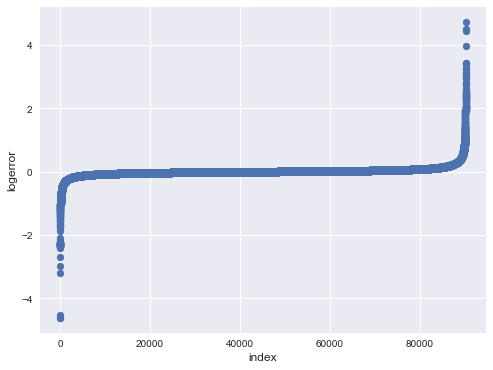

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize = 12)
plt.ylabel('logerror', fontsize = 12)
plt.show()

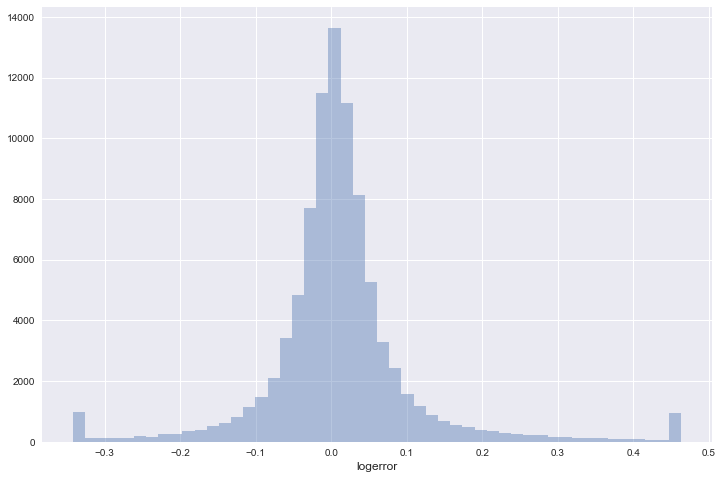

In [20]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)
train_df['logerror'].ix[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [23]:
print(ulimit)
print(llimit)

0.463703198832
-0.3425


In [22]:
print(train_df.logerror.values)

[ 0.0276 -0.1684 -0.004  ..., -0.2679  0.0602  0.4207]


In [ ]:
p